### C S 329E HW 4

## Pair Programming Group Number: 17
## Members of Team: Elena Zhang, Emily Zhou

## Decision Tree Classifier


For this weeks homework we are going to explore ideas around decision tree implementation!  

We will implement some helper functions that would be necessary for a home-grown tree:
  - calc_entropy
  - calc_gini
  
and them test them out at given data splits. 
  
And finally, to perform predictive and descriptive analytics we use the [Decision Tree Classifier](https://scikit-learn.org/stable/modules/tree.html#classification) class in the scikit-learn package.

  
For this assignment, the stopping condition will be the depth of the tree. The impurity measure can be either `Entropy` or `Gini`.

To test our tree built from the Decision Tree Classifier class, we will revisit our Melbourne housing data (that has been cleaned and pruned) and use the files:

   - `melb_tree_train.csv` for training the decision tree (we'll also see what happens if we use the same data to test as we used to train the data in the last problem)
   - `melb_tree_test.csv` for testing the decision tree

There are 10 features in these dataframes that we can use to describe and predict the class label housing "Type", which is 'h' house, 'u' duplex, or 't' townhome. 

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import log2
from sklearn import tree # you'll probably need to install this - look at Q6 for a link 
import graphviz # you'll probably need to install this - look at Q6 for a link 

## Q1 Load the Data
Load in the melb_tree_train.csv into a dataframe, and split that dataframe into `df_X`, which contains the features of the data set (everything but `Type`), and `s_y`, the series containing just the class label (just `Type`). The lengths of `df_X` and `s_y` should match.

In [2]:
# Load training dataset into dataframe
training_df = pd.read_csv('melb_tree_train.csv')

In [3]:
# get a list of all the columns we want in df_X
Xlst = list(training_df)
Xlst.remove('Type')
Xlst

['Rooms',
 'Price',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea']

In [4]:
# split into df_X and s_y
df_X = training_df[Xlst]
s_y = training_df['Type']
s_y

0      t
1      t
2      u
3      h
4      u
      ..
805    t
806    u
807    t
808    t
809    h
Name: Type, Length: 810, dtype: object

In [5]:
# Check the lengths of df_X and s_y
len(df_X)

810

In [6]:
len(s_y)

810

## Q2 Implement a function to calculate entropy 
Implement a function `calc_entropy` that takes the the class label series, `s_y`, as a parameter. Implement using the definition on p128 in the DM book and only use pandas and log2 libraries

In [7]:
# calc_entropy(s_y) definition
def calc_entropy(s_y):
    n = len(s_y) # total number of observations ni the node
    cl = s_y.value_counts() # number of observations in each category
    entropy = 0 # counter
    for i in cl:
        entropy -= (i/n)*log2(i/n)
    
    return entropy
        

## Q3 Use the entropy function to
  - (a) Calculate the entropy of the entire training set
  - (b) Calculate the entropy of the three partitions formed from 
    * Landsize $\in$ [0,200]
    * Landsize $\in$ (200,450]
    * Landsize $\in$ (450, $\infty$)

In [8]:
# The entire data set
calc_entropy(s_y)

1.582533311426178

In [9]:
# Less than or equal to 200
small_land = training_df.loc[(training_df['Landsize']>=0) & (training_df['Landsize']<=200)]
calc_entropy(small_land['Type'])

1.3456432116206725

In [10]:
# Between 200 and 450
mid_land = training_df.loc[(training_df['Landsize']>200) & (training_df['Landsize']<=450)]
calc_entropy(mid_land['Type'])

1.4660501816027975

In [11]:
# greater than 450
big_land = training_df.loc[training_df['Landsize']>450]
calc_entropy(big_land['Type'])

1.09954792005911

## Q4 Implement a function to calculate the Gini Index
Implement the function `calc_gini` that takes the class label series, `s_y`, as a parameter. Implement using the definition on p128 in the DM book and only use the pandas library.

In [12]:
def calc_gini( s_y ):
    n = len(s_y) # total number of observations in the node
    cl = s_y.value_counts() # number of observations in each category
    entropy = 1 # counter
    for i in cl:
        entropy -= (i/n)**2
    
    return entropy

In [13]:
calc_gini(s_y)

0.6655601280292637

## Q5 Use the Gini Index function to
  - (a) Calculate the Gini index of the entire training set
  - (b) Calculate the Gini index of the three partitions formed from 
    * Landsize $\in$ [0,200]
    * Landsize $\in$ (200,450]
    * Landsize $\in$ (450, $\infty$)

In [14]:
# The entire data set
calc_gini(s_y)

0.6655601280292637

In [15]:
# Less than or equal to 200
small_land = training_df.loc[training_df['Landsize']<=200]
calc_gini(small_land['Type'])

0.5741211482422965

In [16]:
# Between 200 and 450
mid_land = training_df.loc[(training_df['Landsize']>200) & (training_df['Landsize']<=450)]
calc_gini(mid_land['Type'])

0.6101021682602731

In [17]:
# greater than 450
big_land = training_df.loc[training_df['Landsize']>450]
calc_gini(big_land['Type'])

0.4381934171597633

## Q6 Create a decision tree 
Using [scikit-learn](https://scikit-learn.org/stable/modules/tree.html#tree) create a multi class classifer for the data set using the Entropy impurity measure and a max depth of 3.

Note that scikit-learn's algorithm doesn't handle categorical data, so that needs to be preprocessed using an one hot encoding.

Display the tree using `export_text` from sklearn.tree, and use that information to write some descriptive analytics on the classification of houses.  For extra fun, use the export_graphviz to draw the graph (see documentation on the [scikit-learn webpage](https://scikit-learn.org/stable/modules/tree.html#classification)). 

In [18]:
# One hot encoding
df_X_encoded = pd.get_dummies(df_X)
s_y_encoded = pd.get_dummies(s_y)

In [19]:
# Create Tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf = clf.fit(df_X_encoded, s_y_encoded)

In [20]:
# Display text version of the tree
print(tree.export_text(clf, feature_names = list(df_X_encoded.columns)))

|--- BuildingArea <= 99.50
|   |--- Landsize <= 76.00
|   |   |--- BuildingArea <= 81.50
|   |   |   |--- class: 0
|   |   |--- BuildingArea >  81.50
|   |   |   |--- class: 0
|   |--- Landsize >  76.00
|   |   |--- YearBuilt <= 1957.50
|   |   |   |--- class: 1
|   |   |--- YearBuilt >  1957.50
|   |   |   |--- class: 0
|--- BuildingArea >  99.50
|   |--- YearBuilt <= 1976.50
|   |   |--- Landsize <= 429.00
|   |   |   |--- class: 1
|   |   |--- Landsize >  429.00
|   |   |   |--- class: 1
|   |--- YearBuilt >  1976.50
|   |   |--- Landsize <= 443.50
|   |   |   |--- class: 0
|   |   |--- Landsize >  443.50
|   |   |   |--- class: 2



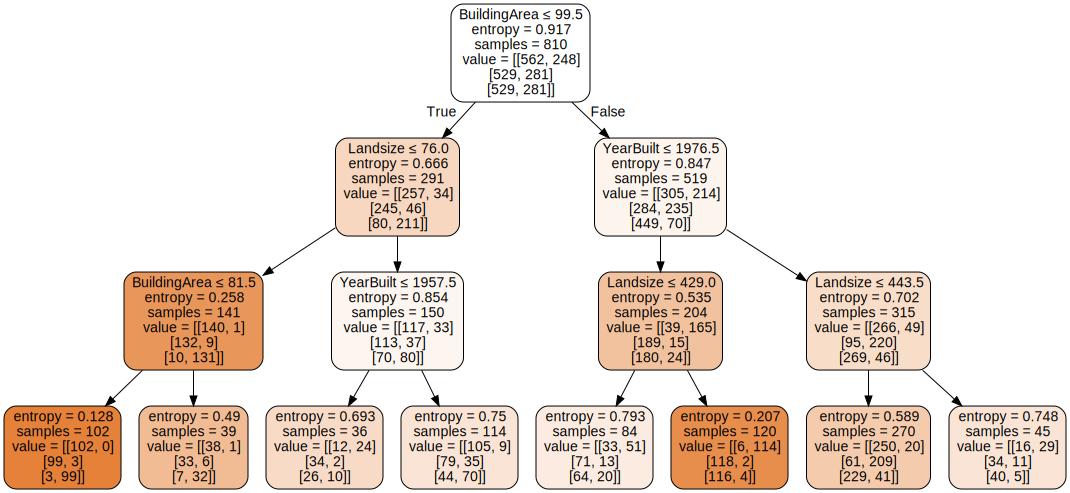

In [21]:
# Display graphviz version of the tree
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=list(df_X_encoded.columns),  filled=True, rounded = True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

➡️ Answer containing your descriptive analytics in markdown here ⬅️

One interesting aspect of this decision tree is that only BuildingArea, Landsize, and YearBuilt are used to split the data among all of the attributes. This means that these three attributes result in the lowest impurity at each level. Another interesting observation is that the node purity at each node is not necessarily lower than its parent.

## Q7 Calculate the Accuracy and Display Learning Curve
Load in the test data from melb_tree_test.csv.

Use the scikit-learn library to create many decision trees, each one with a different configuration (aka Hyperparameters).  You will create 28 different trees by:

    - Varying the max depth from 2 to 15 with the Gini Index as the impurity measure
    - Varying the max depth from 2 to 15 with the Entropy as the impurity measure

Implementation tip: you can create an array of numbers from 2 to 15 by using the numpy function [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).

For each of the 28 decistion trees, calculate the error rate by using the data in the: 
  - Training set, and
  - Test set.

Display the results graphicaly, and offer an analysis of the trend (or if no trend present, offer a hypotheisis of why).  The max depth should be on the x-axis, and the error rate should be on the y-axis (see figure 3.23 in your DM textbook for a similar style of graph that uses leaf nodes instead of depth for the x-axis). Your plot will include 4 series of data
   - Test error (entropy)
   - Test error (gini index)
   - Training error (entropy)
   - Training error (gini index)

In [22]:
# Load in the test data
test_df = pd.read_csv('melb_tree_test.csv')
# Split up test data into attributes and Type
df_X_test = test_df[Xlst]
s_y_test = test_df['Type']

In [23]:
# One hot encoding on test data
df_X_test_encoded = pd.get_dummies(df_X_test)
s_y_test_encoded = pd.get_dummies(s_y_test)

In [24]:
# function to calculate accuracy
def calc_accuracy(prediction, s_y):
    c = 0
    for i in range(0, len(prediction)):
        if prediction.iloc[i].equals(s_y.iloc[i]):
            c += 1
    accuracy = c/len(prediction)
    return accuracy

In [25]:
# Build the trees using the training data
depth = np.arange(2,16)
# Trees using Gini index
train_error_gini = []
test_error_gini = []
for i in depth:
    #build tree with varying depth
    clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = i)
    clf = clf.fit(df_X_encoded, s_y_encoded)
    #apply model on training data
    train_pred = pd.DataFrame(clf.predict(df_X_encoded), columns = ['h','t','u'])
    #calculate training error
    train_error_gini.append(1-calc_accuracy(train_pred, s_y_encoded))
    #apply model on test data
    test_pred = pd.DataFrame(clf.predict(df_X_test_encoded), columns = ['h','t','u'])
    #calculate test error
    test_error_gini.append(1-calc_accuracy(test_pred, s_y_test_encoded))
    
# Trees using entropy
train_error_entropy = []
test_error_entropy = []
for i in depth:
    #build tree with varying depth
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
    clf = clf.fit(df_X_encoded, s_y_encoded)
    #apply model on training data
    train_pred = pd.DataFrame(clf.predict(df_X_encoded), columns = ['h','t','u'])
    #calculate training error
    train_error_entropy.append(1-calc_accuracy(train_pred, s_y_encoded))
    #apply model on test data
    test_pred = pd.DataFrame(clf.predict(df_X_test_encoded), columns = ['h','t','u'])
    #calculate test error
    test_error_entropy.append(1-calc_accuracy(test_pred, s_y_test_encoded)) 

Text(0.5, 1.0, 'Learning Curve Trends')

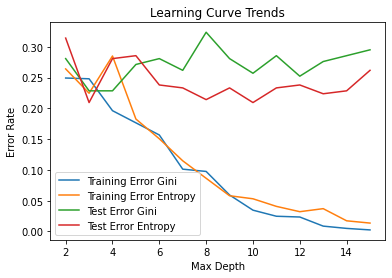

In [26]:
# Plot the 4 learning curves
plt.plot(depth, train_error_gini, label = 'Training Error Gini')
plt.plot(depth, train_error_entropy, label = 'Training Error Entropy')
plt.plot(depth, test_error_gini, label = 'Test Error Gini')
plt.plot(depth, test_error_entropy, label = 'Test Error Entropy')

plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Error Rate')
plt.title('Learning Curve Trends')

➡️ Answer containing your analysis of the trend (or if no trend present, offer a hypotheisis of why) here ⬅️

From the learning curves, we can see that the training errors using both Gini Index and Entropy are decreasing  as depth increases. However, beyond a max depth of 3, we see the training and test errors diverge as the test errors remain relatively constant as max depth increases. This suggests that beyond a max depth of 3, the model is overfitted, because increasing max depth of the model does not significantly improve the test error.